In [1]:
%load_ext autoreload
%autoreload 2

Index(['Interest rates', 'Employment', 'Energy prices',
       'Inflation expectations', 'GDP growth', 'Supply Chain Conditions',
       'Wage Growth'],
      dtype='object')

In [36]:
import pandas as pd
from cpilib import HICP

# Load conferences sentiment data
covariates = pd.read_csv('data/covariates.csv', parse_dates=True)
covariates["Date"] = pd.to_datetime(covariates['Date'])
monthly_covariates = (covariates.resample("MS", on="Date").mean().ffill() - 4.5) / 4.5
covariate_names = monthly_covariates.columns
monthly_covariates = monthly_covariates.reset_index()

# Force reload HICP data
hicp = HICP.from_cache(time_limit=1)


In [37]:
# Set plotly as default plotting backend
import pandas as pd
from darts import TimeSeries

pd.options.plotting.backend = "plotly"

EURO_AREA = "EA"
COICOP_SUBSET = ["FOOD", "NRG", "SERV", "IGD_NNRG"]

prices_df = hicp.prices[EURO_AREA][COICOP_SUBSET].rename_axis("date").reset_index().dropna()
weights_df = hicp.weights[EURO_AREA][COICOP_SUBSET]

prices_ts = TimeSeries.from_dataframe(prices_df, value_cols=COICOP_SUBSET, time_col="date")
prices_mom_ts = TimeSeries.from_dataframe(prices_df.set_index("date").pct_change(1).dropna().reset_index(), value_cols=COICOP_SUBSET, time_col="date")

covariates_ts = TimeSeries.from_dataframe(monthly_covariates, value_cols=covariate_names, time_col="Date")


<Axes: xlabel='date'>

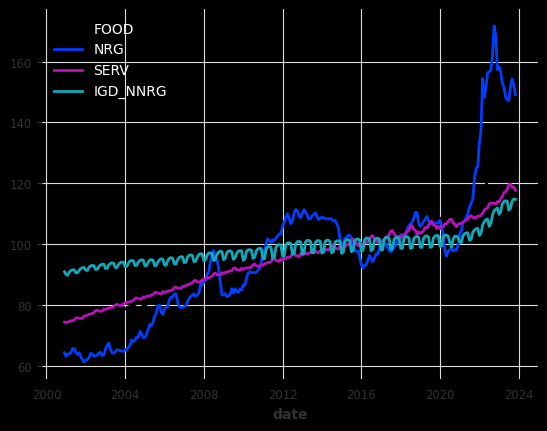

In [38]:
prices_ts.plot()

In [47]:
from llm_inflation.model import MultivariateForecaster

linreg = MultivariateForecaster("LinearRegression", horizon=6, lags=12, prices=prices_mom_ts, weights=None, covariates=prices_mom_ts, lags_covariates=2)
random_forest = MultivariateForecaster("RandomForest", horizon=6, lags=12, prices=prices_mom_ts, weights=None, covariates=prices_mom_ts, lags_covariates=2)
xgboost = MultivariateForecaster("XGBoost", horizon=6, lags=12, prices=prices_mom_ts, weights=None, covariates=prices_mom_ts, lags_covariates=2)

AttributeError: 'MultivariateForecaster' object has no attribute 'lags_covariates'

In [45]:
print(f"Backtest for LinearRegression: {linreg.backtest(1)}")
print(f"Backtest for RandomForest: {random_forest.backtest(1)}")
#print(f"Backtest for XGBoost: {xgboost.backtest(3)}")

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/256 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


Backtest for LinearRegression: 0.006743791053198996


  0%|          | 0/256 [00:00<?, ?it/s]

Backtest for RandomForest: 0.005610925252962111


In [4]:
from llm_inflation.model import MultivariateForecaster

linreg = MultivariateForecaster("LinearRegression", horizon=6, lags=12, prices=prices_mom_ts, weights=None)
random_forest = MultivariateForecaster("RandomForest", horizon=6, lags=12, prices=prices_mom_ts, weights=None)
xgboost = MultivariateForecaster("XGBoost", horizon=6, lags=12, prices=prices_mom_ts, weights=None)

/Users/thomaskientz/Library/Caches/pypoetry/virtualenvs/llm-inflation-H0PNBe9U-py3.9/lib/python3.9/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


In [6]:
print(f"Backtest for LinearRegression: {linreg.backtest(3)}")
print(f"Backtest for RandomForest: {random_forest.backtest(3)}")
print(f"Backtest for XGBoost: {xgboost.backtest(3)}")

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/86 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


Backtest for LinearRegression: 0.006076432707638924


  0%|          | 0/86 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


Backtest for RandomForest: 0.004660963093871858


  0%|          | 0/86 [00:00<?, ?it/s]

Backtest for XGBoost: 0.005261406923682977
